# Zadanie 3

In [1]:
import numba as nb
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
L = 100.0 / 0.05292
m = 0.067
h_bar = 1.0
to_meV = 27211.6

N = 300
dx = L/N

In [14]:
@nb.njit
def f(E,N,dx):
    psi = np.zeros(N + 1)
    psi[0] = 0
    psi[1] = 1
    V = 0
    for i in range(1, N):
        psi[i + 1] = -2 * m * (E - V) * dx**2 * psi[i] - psi[i - 1] + 2 * psi[i]
    return psi[-1]

@nb.njit
def bisection(a, b, acc, N, dx, V):
    while abs(a - b) > acc:
        mid = 0.5 * (a + b)
        if f(a/to_meV ,N,dx) * f(mid/to_meV ,N,dx) < 0:
            b = mid
        else:
            a = mid
    return b

In [10]:
W_size = 500
E_size = 500
C = np.zeros((W_size, E_size))
W = np.linspace(0, 1000, W_size) / to_meV
E = np.linspace(0, 35, E_size) / to_meV
psi = np.zeros((W_size, E_size, N+1))
psi[..., 1] = 1

In [11]:
# Funkcja do obliczania wartości funkcji falowej w punkcie i+1
def Psi(psi_i, psi_im1, E, V):
    return -2 * m / np.square(h_bar) * (E - V) * np.square(dx) * psi_i + 2 * psi_i - psi_im1

In [12]:
for k in range(W_size): 
    for j in range(E_size):
        for i in range(1, N):
            if i == int(N/2):
                V = -W[k]
                psi[k][j][i+1] = Psi(psi[k][j][i], psi[k][j][i-1], E[j], V)
            else:
                V = 0
                psi[k][j][i+1] = Psi(psi[k][j][i], psi[k][j][i-1], E[j], V)

for k in range(W_size):
    for j in range(E_size):
        for i in range(N+1):
            C[k][j] += dx*psi[k][j][i]**2

for k in range(W_size):
    for j in range(E_size):
        for i in range(N+1):
            psi[k][j][i] = psi[k][j][i]/np.sqrt(C[k][j])

W *= 27211.6
E *= 27211.6

In [27]:
acc = 1e-4
results = np.zeros((500, 7))

In [31]:
# Pętla do obliczania wartości W
for i in range(len(W)):
    a_1 = np.array([0, 20, 60, 125, 180, 275, 380])
    b_1 = np.array([30, 40, 120, 150, 250, 320, 480])
    
    for j in range(a_1.size):
        E_left = E[a_1[j]]
        E_right = E[b_1[j]]
        V = -W[i]
        # Wywołanie funkcji bisection
        results[i][j] = bisection(E_left, E_right, 1e-4, N, dx, V)

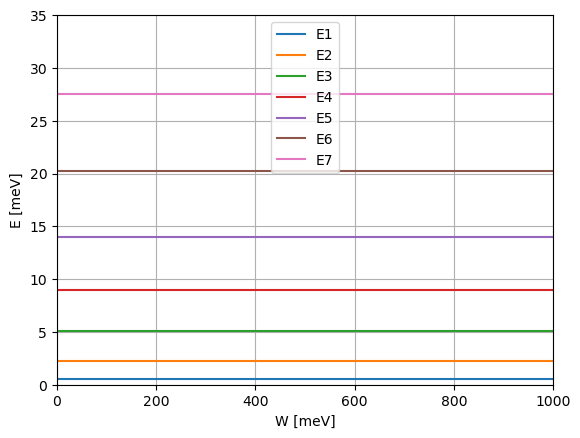

In [32]:
for j in range(7):
    plt.plot(W, results[:, j], label=f'E{j + 1}')

plt.xlabel("W [meV]")
plt.ylabel("E [meV]")
plt.xlim(0, 1000)
plt.ylim(0, 35)
plt.grid()
plt.legend()
plt.show()

In [65]:
N = 300 # ilość punktów
W_size = 500
E_size = 500
C = np.zeros((W_size, E_size)) # stała skalująca funkcję falową
W = np.linspace(0, 1500, W_size) / 27211.6 # bariera potencjału
E_3 = np.linspace(0, 35, E_size) / 27211.6
dx = L/N
psi_3 = np.zeros((W_size, E_size, N+1))
psi_3[..., 1] = 1

In [66]:
# Narysować funkcje falowe 5 najniższych stanów dla W = 0.5 eV
W_1 = 500/27211.6
E_32size = 50000
E_32 = np.linspace(0, 35, E_32size) / 27211.6
C_32 = np.zeros(len(E_32))
psi_32 = np.zeros((len(E_32), N+1)) 
psi_32[..., 1] = 1

In [67]:
for j in range(E_32size): # pętla po 5 miejscach zerowych E
    for i in range(1, N): # pętla po x
        if i == int(N/2):
            V = W_1
            psi_32[j][i+1] = -(2*m/(h_bar**2))*(E_32[j]-V)*(dx**2)*psi_32[j][i] - \
                            psi_32[j][i-1] + 2*psi_32[j][i]
        else:
            V = 0
            psi_32[j][i+1] = -(2*m/(h_bar**2))*(E_32[j]-V)*(dx**2)*psi_32[j][i] - \
                            psi_32[j][i-1] + 2*psi_32[j][i]

    for i in range(N+1): # Stała C
        C_32[j] += dx*psi_32[j][i]**2

    for i in range(N+1): # Normowanie
        psi_32[j][i] = psi_32[j][i]/np.sqrt(C_32[j])

E_32 *= 27211.6

In [68]:
acc = 0.001 # meV (27211.6)
a_32 = np.array([2450, 3100, 10000, 12500, 23500]) #indeksy tablicy 'E', które osaczają miejsca zerowe dla size=50k
b_32 = np.array([2550, 3300, 10500, 13000, 24100])
m_tmp_32 = np.zeros(len(a_32))

In [69]:
for id, a32 in enumerate(a_32):
    while abs(E[int(a32)] - E[int(b_32[id])]) > acc:
        m_tmp_32[id] = 0.5*(a32+b_32[id])
        
        if psi_32[int(a32), -1]*psi_32[int(m_tmp_32[id]), -1] < 0:
            b_32[id] = m_tmp_32[id]
        if psi_32[int(b_32[id]), -1]*psi_32[int(m_tmp_32[id]), -1] < 0:
            a32 = m_tmp_32[id]

IndexError: index 2450 is out of bounds for axis 0 with size 500